In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [129]:
df = pd.read_csv('../content/Sentiment_Analysis.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [130]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


Preprocessing the dataset

In [131]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
  r =re.findall(pattern, input_txt)
  for word in r:
    input_txt = re.sub(word,"", input_txt)
  return input_txt

In [132]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [133]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [134]:
# remove special charaters, numbers and Punctvations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [135]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [136]:
# indiviual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [137]:
# stem the words
from nltk.stem.porter import PorterStemmer
Stemmer = PorterStemmer()

tokenzed_tweet = tokenized_tweet.apply(lambda sentence: [Stemmer.stem(word) for word in sentence])
tokenzed_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [138]:
# combine word into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head

<bound method NDFrame.head of           id  label                                              tweet  \
0          1      0   @user when a father is dysfunctional and is s...   
1          2      0  @user @user thanks for #lyft credit i can't us...   
2          3      0                                bihday your majesty   
3          4      0  #model   i love u take with u all the time in ...   
4          5      0             factsguide: society now    #motivation   
...      ...    ...                                                ...   
31957  31958      0  ate @user isz that youuu?ðððððð...   
31958  31959      0    to see nina turner on the airwaves trying to...   
31959  31960      0  listening to sad songs on a monday morning otw...   
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...   
31961  31962      0                   thank you @user for you follow     

                                             clean_tweet  
0      when father dys

In [139]:
 # !pip install wordcloud

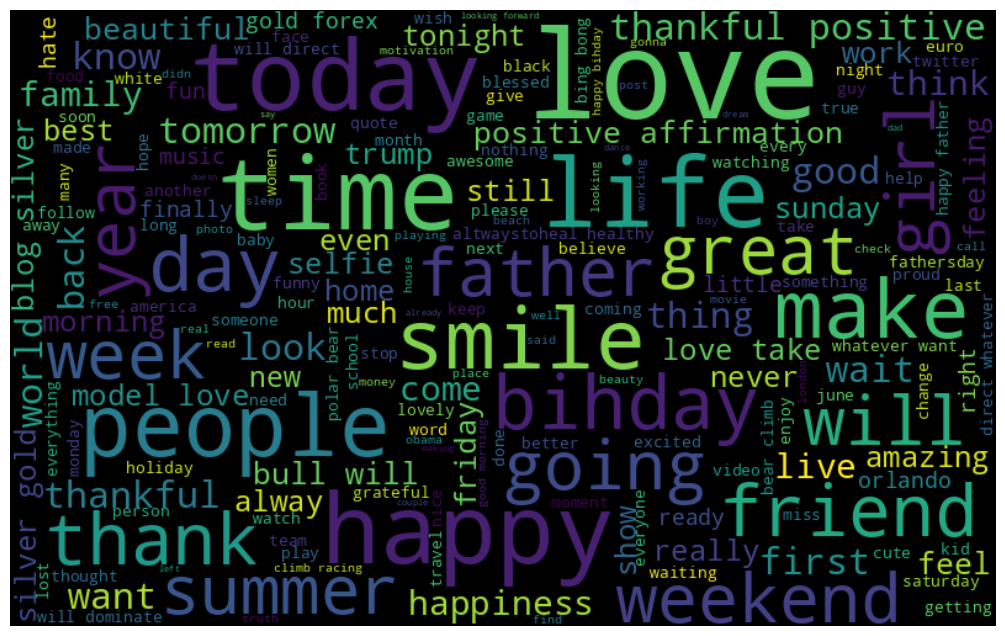

In [140]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


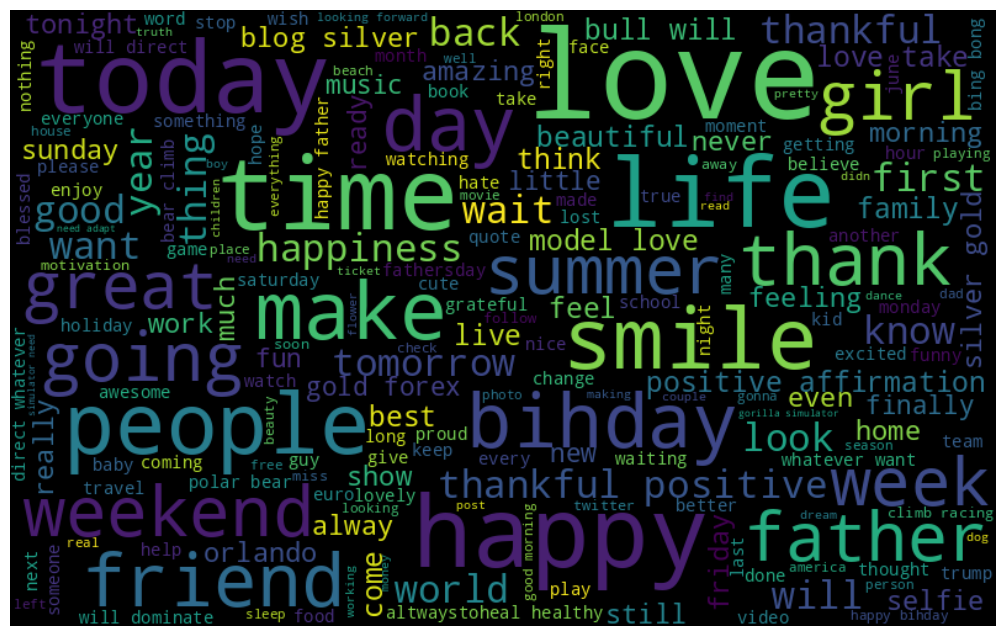

In [141]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


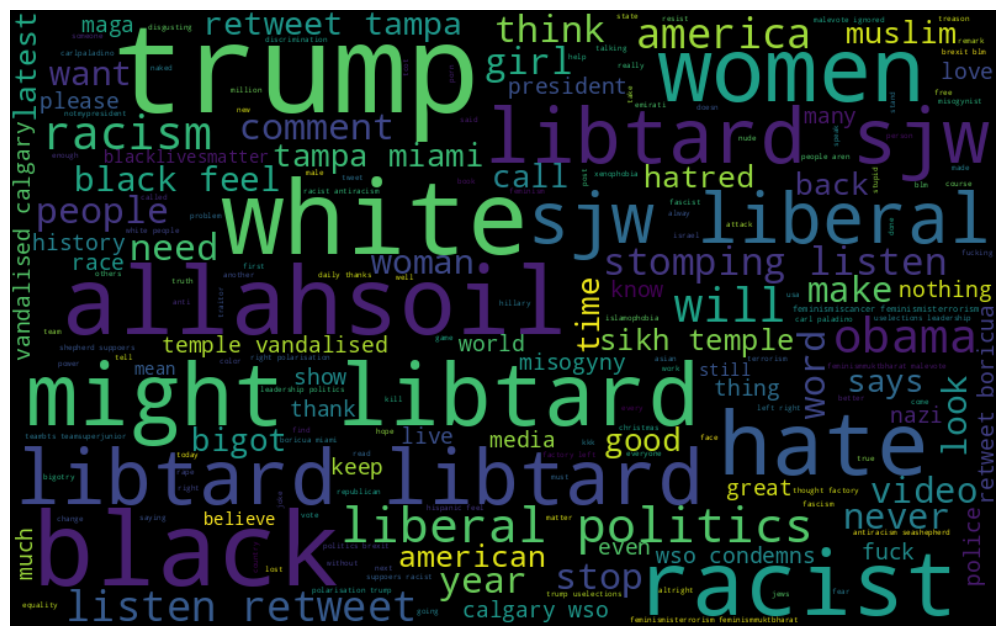

In [142]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [143]:
# extract the hashtag
def hashtag_extract(tweet):
    hashtags =[]
    # loopword in the tweet
    for tweet in tweet:
      ht = re.findall(r"#(\w+)", tweet)
      hashtags.append(ht)
      return hashtags

In [144]:
# extract hashtags from non racist/sexist tweets
ht_positive  = hashtag_extract(df['clean_tweet'][df['label']==1])
# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [145]:
ht_positive[:5]

[['cnn', 'michigan', 'tcot']]

In [146]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [147]:
ht_positive[:5]

['cnn', 'michigan', 'tcot']

In [148]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({ 'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,1
1,michigan,1
2,tcot,1


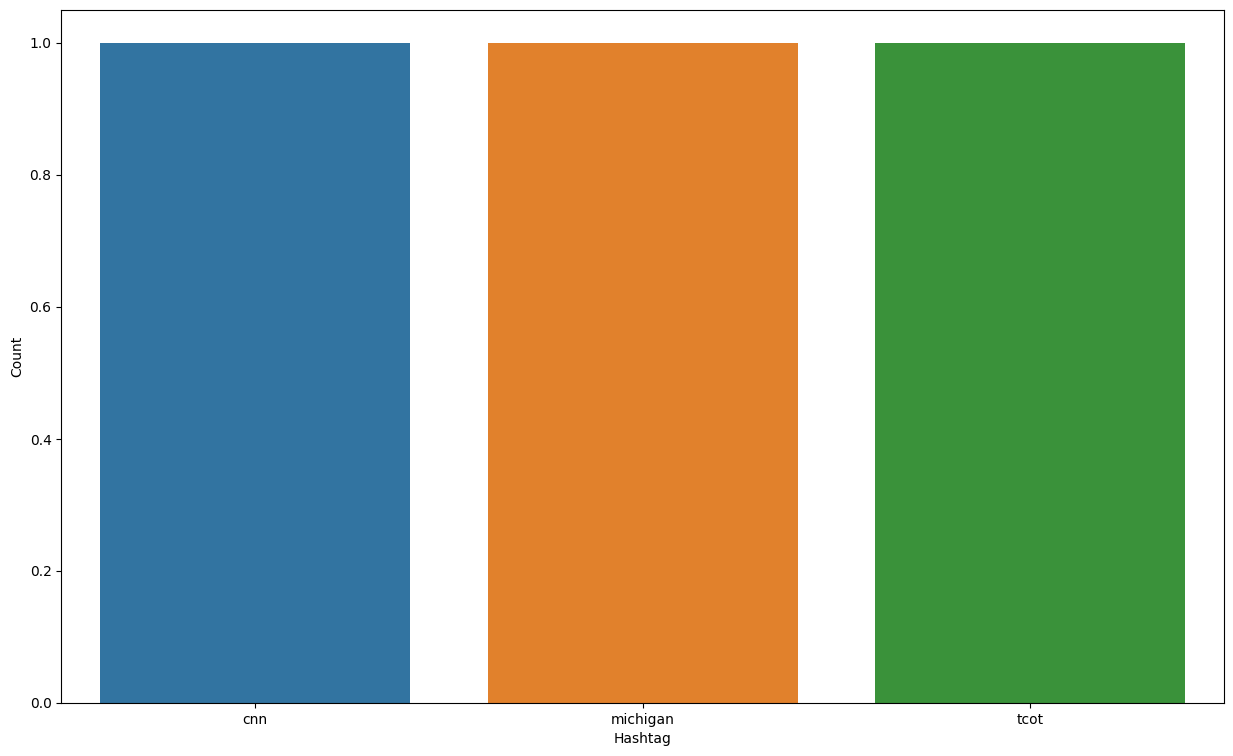

In [149]:
# select top 10 hashtags
d = d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [150]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.09, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [151]:
# bow[0].toarray()

In [152]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)


In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [154]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [155]:
# testing
pred = model.predict(x_test)
f1_score(y_test,pred)

0.4674046740467405

In [158]:
accuracy_score(y_test,pred)

0.9458140407958954

In [160]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5154004106776181

In [161]:
accuracy_score(y_test,pred)

0.9409335502440245

In [163]:
pred_prob[0][1] >= 0.3

False